In [ ]:
#######################################################
#######################################################
##
## This notebook creates a line graph
## showing the growth of various repositories 
## across the years 1998-2018.
##
#######################################################
#######################################################

In [43]:
# load required modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [44]:
# read in the data
df = pd.read_csv('yearlyStats.csv', index_col = 'date')

In [45]:
## CLEAN THE DATA ##

# sum all INSDC data into one column
df['OG_INSDC'] = df.loc[:,['OG_NCBI_SRA', 'OG_DDBJ', 'OG_EMBL']].sum(axis = 1)
df['RE_INSDC'] = df.loc[:,['RE_NCBI_SRA', 'RE_DDBJ', 'RE_EMBL']].sum(axis = 1)

# drop columns we no longer need, and incomplete 2019 data
dropthese = ['OG_NCBI_SRA', 'OG_DDBJ', 'OG_EMBL', 'RE_NCBI_SRA', 'RE_DDBJ', 'RE_EMBL']
df = df.drop(columns = dropthese, index = 2019)

In [46]:
df

,OG_NCBI_GEO,RE_NCBI_GEO,OG_INSDC,RE_INSDC
date,,,,
1998,1,0,0,0
1999,3,0,0,0
2000,1,0,0,0
2001,5,1,0,0
2002,13,3,0,0
2003,12,2,0,0
2004,49,7,0,0
2005,152,10,0,0
2006,292,45,0,0


In [92]:
# reformat the dataframe into something the plotting package likes

cols = [['date', 'original', 'reused', 'source']]
years = list(range(1998,2019))

for y in years: 
    cols.append([y, df['OG_NCBI_GEO'][y], df['RE_NCBI_GEO'][y], 'GEO'])
    cols.append([y, df['OG_INSDC'][y], df['RE_INSDC'][y], 'INSDC'])
    
df_tags = pd.DataFrame(cols, dtype = 'float')

newHeader = df_tags.iloc[0]
df_tags = df_tags[1:]
df_tags.columns = newHeader

df_tags

,date,original,reused,source
1,1998,1,0,GEO
2,1998,0,0,INSDC
3,1999,3,0,GEO
4,1999,0,0,INSDC
5,2000,1,0,GEO
6,2000,0,0,INSDC
7,2001,5,1,GEO
8,2001,0,0,INSDC
9,2002,13,3,GEO
10,2002,0,0,INSDC


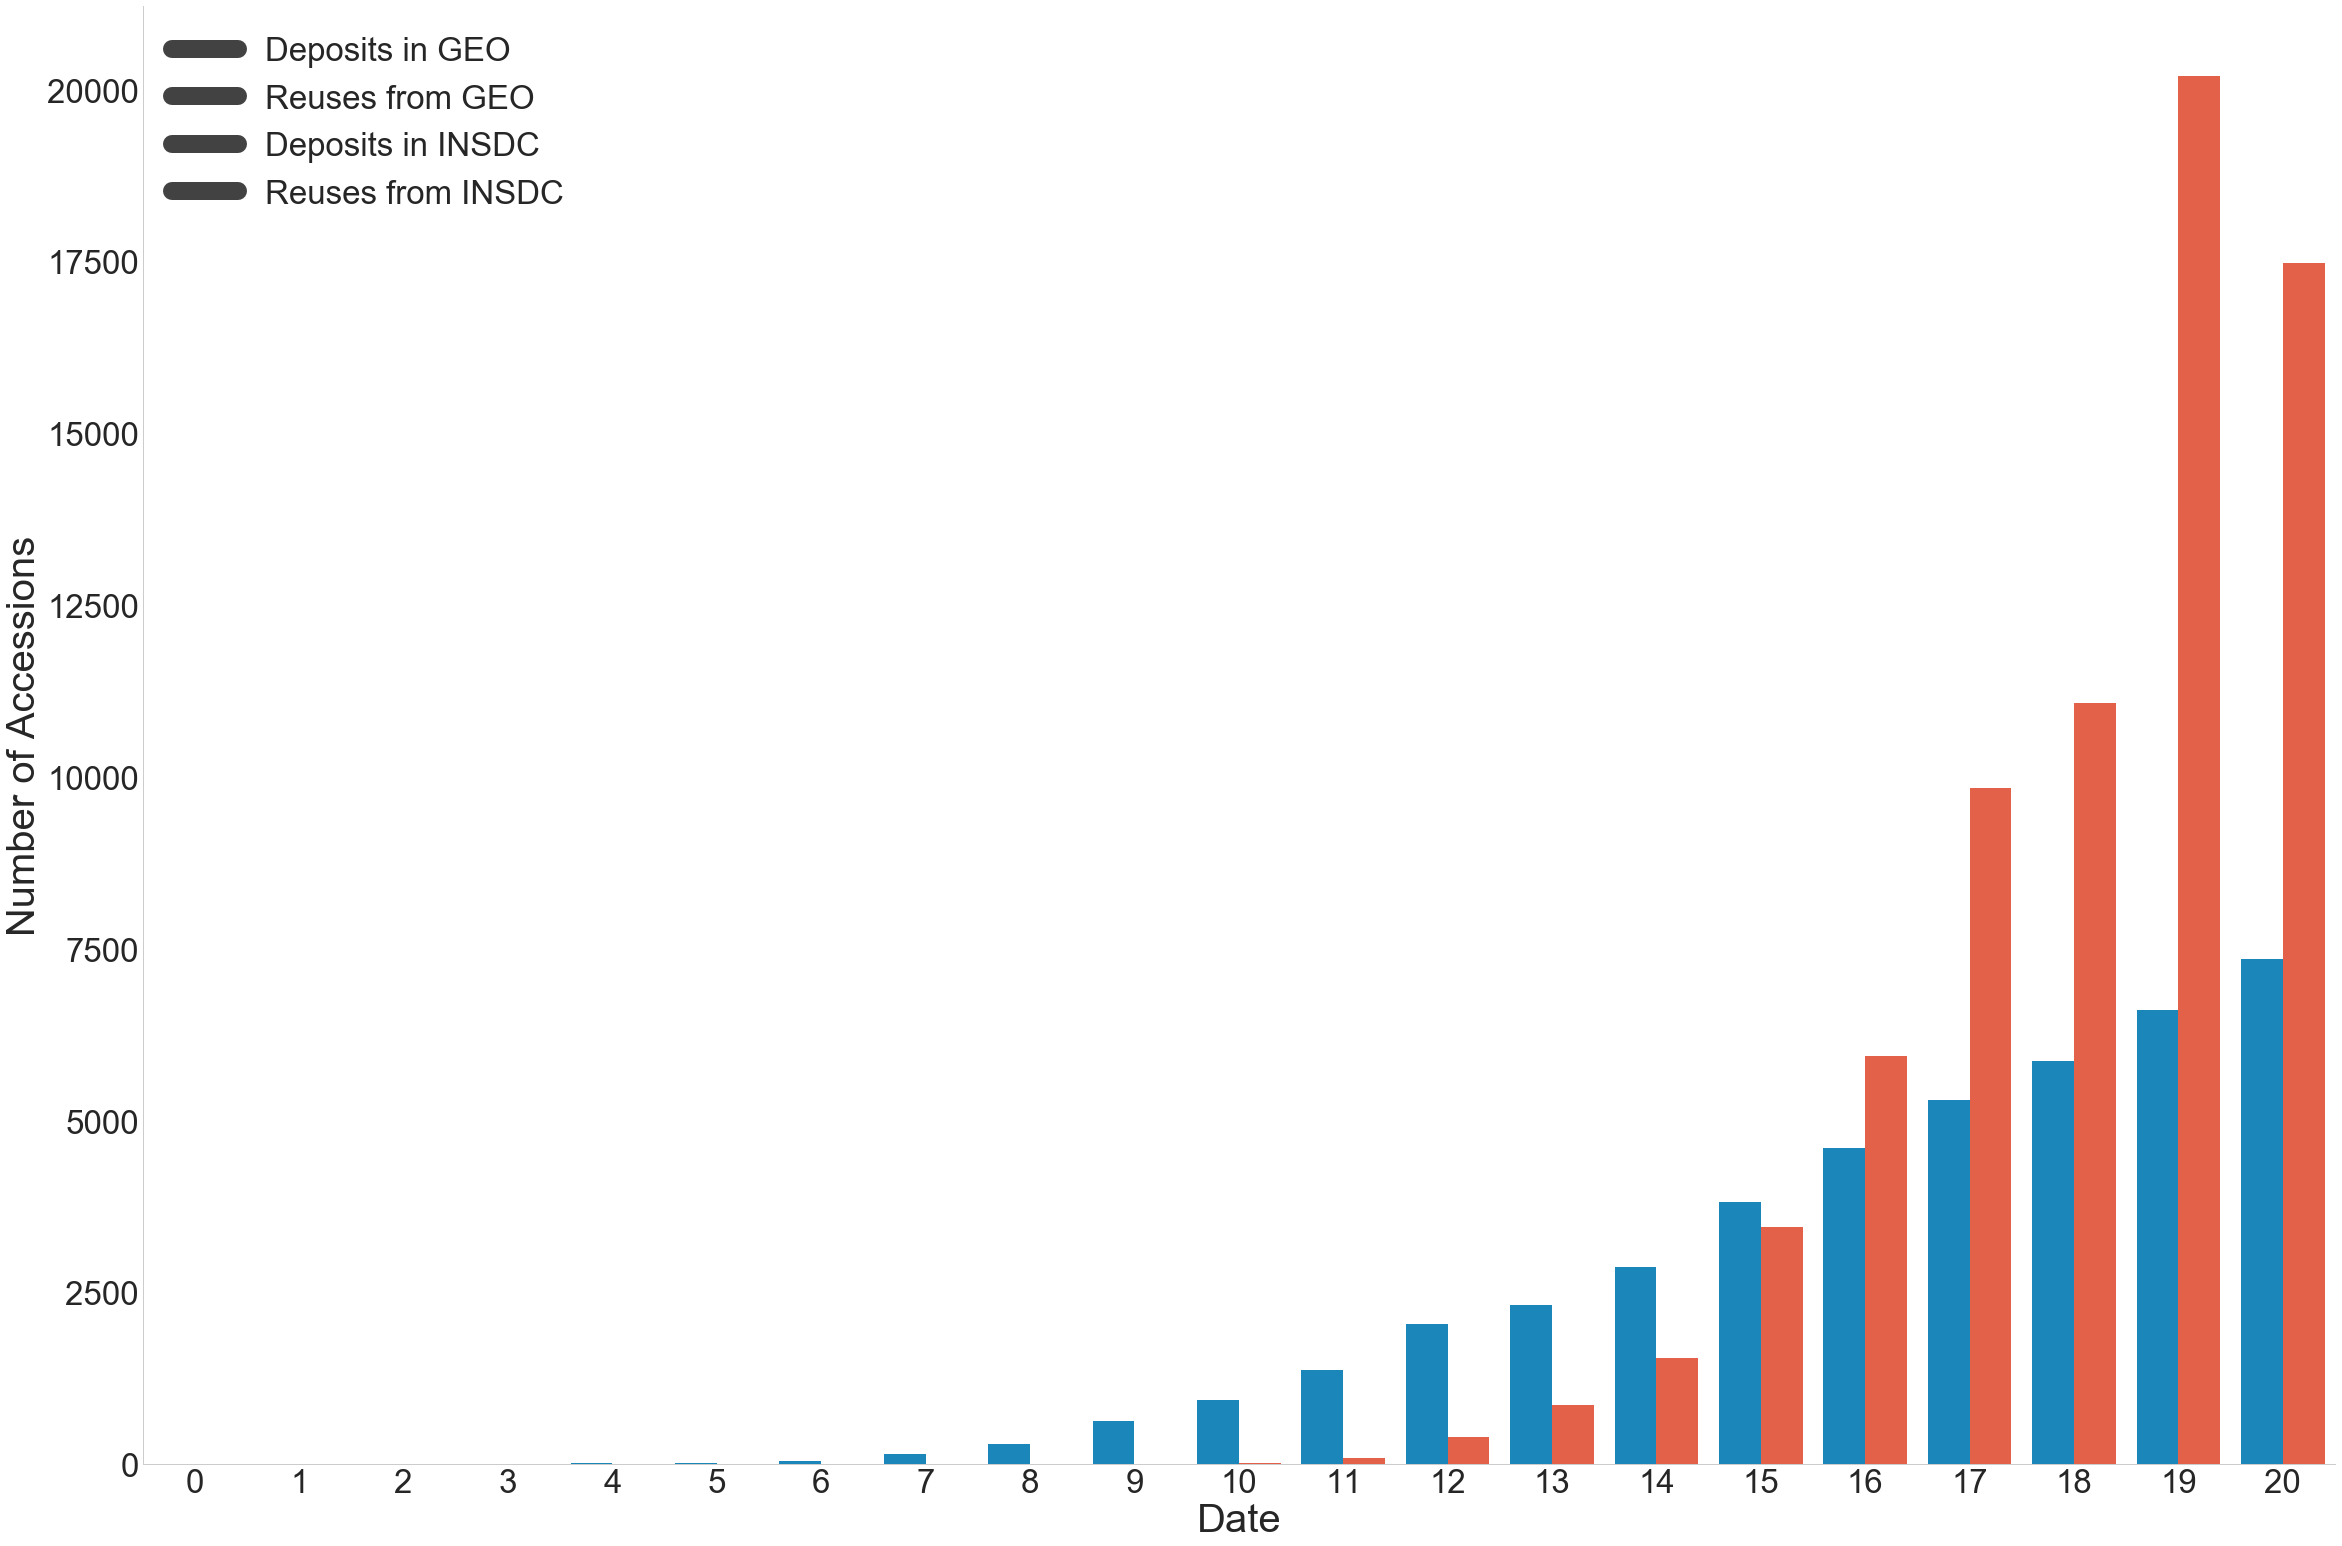

In [93]:
# plot the line graph

# make the aesthetics look nice
plt.style.use('seaborn-whitegrid')
sns.set_context(font_scale=3, rc={"lines.linewidth": 10})

# create figure and axis objects
plt.figure(figsize=(35,25))
ax = sns.barplot(data = df_tags, x = 'date', y = 'original', hue = 'source')
ax.grid(False)
sns.despine()

# stop decimals on the end of the years
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# set all the labels
ax.set_xlabel("Date", fontsize=40)
ax.set_ylabel("Number of Accessions", fontsize=40)
plt.legend(loc='upper left', labels=['Deposits in GEO', 'Reuses from GEO', 'Deposits in INSDC', 'Reuses from INSDC'])

# save to .png file
graph = ax.get_figure()
graph.savefig('repoGrowth.png', dpi = 200, bbox_inches = 'tight', transparent = True)